Autorzy:
107851
107683
105647

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Przygotowaine danych

In [2]:
import os

base_dir = os.path.abspath('')
path = os.path.join(base_dir, '../Przetwarzanie Danych/')
co2_production = pd.read_csv(path + 'co2_production.csv')
gni_per_capita = pd.read_csv(path + 'gross_national_income_per_capital.csv')
hdi = pd.read_csv(path + 'human_development_index.csv')
life_expectancy = pd.read_csv(path + 'life_expectancy_by_birth.csv')

all_data = life_expectancy.copy()

In [3]:
for dataframe in [co2_production, gni_per_capita, hdi]:
    all_data = all_data.merge(dataframe, on='Country', how='outer', suffixes=('', '_drop'))

all_data = all_data[all_data.columns.drop(list(all_data.filter(regex='_drop')))]

columns_to_drop = ['ISO3', 'hdicode', 'hdi_rank_2021']
all_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')


all_data['avg_co2'] = all_data.filter(like='co2_prod_').mean(axis=1)
all_data['avg_gni'] = all_data.filter(like='gnipc_').mean(axis=1)  

In [4]:
for year in range(1990, 2022):
    co2_column_name = f"co2_prod_{year}"
    gni_column_name = f"gnipc_{year}"
    estimated_population_column_name = f"estimated_population_{year}"
    co2_per_capita_column_name = f"co2_per_capita_{year}"
    
    if co2_column_name in all_data.columns and gni_column_name in all_data.columns:
        all_data[estimated_population_column_name] = all_data[co2_column_name] / all_data[gni_column_name]
        all_data[co2_per_capita_column_name] = all_data[co2_column_name] / all_data[estimated_population_column_name]


print(all_data['avg_co2'].describe())
print(all_data['avg_gni'].describe())

count    204.000000
mean       4.499696
std        5.972266
min        0.038186
25%        0.639804
50%        2.227585
75%        6.370562
max       48.440912
Name: avg_co2, dtype: float64
count       204.000000
mean      16488.239856
std       18703.085972
min         841.037957
25%        3768.881573
50%        9515.751330
75%       20114.611191
max      111709.939782
Name: avg_gni, dtype: float64


In [5]:
all_data['co2_gni_interaction'] = all_data['avg_co2'] * all_data['avg_gni']

In [6]:
for col in all_data.columns:
    if all_data[col].dtype == 'object':
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)
    else:
        all_data[col].fillna(all_data[col].mean(), inplace=True)

encoder = OneHotEncoder(drop='first')
encoded_region = encoder.fit_transform(all_data[['region']])
encoded_region_df = pd.DataFrame(encoded_region.toarray(), columns=encoder.get_feature_names_out(['region']))
all_data = pd.concat([all_data.drop(['region'], axis=1), encoded_region_df], axis=1)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
all_data

,Country,le_1990,le_1991,le_1992,le_1993,le_1994,le_1995,le_1996,le_1997,le_1998,le_1999,le_2000,le_2001,le_2002,le_2003,le_2004,le_2005,le_2006,le_2007,le_2008,le_2009,le_2010,le_2011,le_2012,le_2013,le_2014,le_2015,le_2016,le_2017,le_2018,le_2019,le_2020,le_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,co2_prod_1996,co2_prod_1997,co2_prod_1998,co2_prod_1999,co2_prod_2000,co2_prod_2001,co2_prod_2002,co2_prod_2003,co2_prod_2004,co2_prod_2005,co2_prod_2006,co2_prod_2007,co2_prod_2008,co2_prod_2009,co2_prod_2010,co2_prod_2011,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021,gnipc_1990,gnipc_1991,gnipc_1992,gnipc_1993,gnipc_1994,gnipc_1995,gnipc_1996,gnipc_1997,gnipc_1998,gnipc_1999,gnipc_2000,gnipc_2001,gnipc_2002,gnipc_2003,gnipc_2004,gnipc_2005,gnipc_2006,gnipc_2007,gnipc_2008,gnipc_2009,gnipc_2010,gnipc_2011,gnipc_2012,gnipc_2013,gnipc_2014,gnipc_2015,gnipc_2016,gnipc_2017,gnipc_2018,gnipc_2019,gnipc_2020,gnipc_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,avg_co2,avg_gni,estimated_population_1990,co2_per_capita_1990,estimated_population_1991,co2_per_capita_1991,estimated_population_1992,co2_per_capita_1992,estimated_population_1993,co2_per_capita_1993,estimated_population_1994,co2_per_capita_1994,estimated_population_1995,co2_per_capita_1995,estimated_population_1996,co2_per_capita_1996,estimated_population_1997,co2_per_capita_1997,estimated_population_1998,co2_per_capita_1998,estimated_population_1999,co2_per_capita_1999,estimated_population_2000,co2_per_capita_2000,estimated_population_2001,co2_per_capita_2001,estimated_population_2002,co2_per_capita_2002,estimated_population_2003,co2_per_capita_2003,estimated_population_2004,co2_per_capita_2004,estimated_population_2005,co2_per_capita_2005,estimated_population_2006,co2_per_capita_2006,estimated_population_2007,co2_per_capita_2007,estimated_population_2008,co2_per_capita_2008,estimated_population_2009,co2_per_capita_2009,estimated_population_2010,co2_per_capita_2010,estimated_population_2011,co2_per_capita_2011,estimated_population_2012,co2_per_capita_2012,estimated_population_2013,co2_per_capita_2013,estimated_population_2014,co2_per_capita_2014,estimated_population_2015,co2_per_capita_2015,estimated_population_2016,co2_per_capita_2016,estimated_population_2017,co2_per_capita_2017,estimated_population_2018,co2_per_capita_2018,estimated_population_2019,co2_per_capita_2019,estimated_population_2020,co2_per_capita_2020,estimated_population_2021,co2_per_capita_2021,co2_gni_interaction,region_EAP,region_ECA,region_LAC,region_SA,region_SSA
0,Afghanistan,45.967200,46.663100,47.595500,51.466400,51.494500,52.544200,53.243300,53.634200,52.943100,54.846400,55.297800,55.798100,56.453800,57.344500,57.943600,58.360800,58.684400,59.111300,59.851500,60.363600,60.850800,61.419100,61.923000,62.416700,62.545100,62.658700,63.136100,63.016000,63.081000,63.564500,62.575100,61.982400,0.209727,0.182525,0.095233,0.084285,0.075054,0.067943,0.061787,0.056005,0.052144,0.040133,0.036462,0.036931,0.046529,0.050083,0.035960,0.050802,0.061870,0.083711,0.151485,0.237367,0.287739,0.401954,0.327922,0.261571,0.232967,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376,2684.550019,2276.289409,2059.868084,1525.533426,1087.961890,1339.087122,1332.307210,1230.261290,1149.902390,1071.800919,984.997434,894.024589,1267.628852,1401.324413,1384.695729,1435.191730,1518.767846,1811.166659,1753.066993,1884.200863,1938.315627,1999.653042,2125.862821,2193.553936,2178.507021,2101.589319,2077.566899,2085.487571,2054.939895,2097.889450,1997.852149,1824.190915,0.273000,0.279000,0.287000,0.297000,0.292000,0.310000,0.319000,0.323000,0.324000,

In [9]:
df = pd.DataFrame(columns=["co2", "gnipc", "hdi", "region_EAP",	"region_ECA", "region_LAC", "region_SA", "region_SSA", "le"])
df


,co2,gnipc,hdi,region_EAP,region_ECA,region_LAC,region_SA,region_SSA,le


In [10]:
index = 0

for i, row in all_data.iterrows():
    for year in range(1990, 2022):
        new_row = {
            'co2': row[f'co2_per_capita_{year}'],
            'hdi': row[f'hdi_{year}'],
            'le': row[f'le_{year}'],
            'gnipc': row[f'gnipc_{year}'],
            'region_EAP': row['region_EAP'],
            'region_ECA': row['region_ECA'],
            'region_LAC': row['region_LAC'],
            'region_SA': row['region_SA'],
            'region_SSA': row['region_SSA']
        }

        df.loc[index] = new_row
        index += 1

In [11]:
df

,co2,gnipc,hdi,region_EAP,region_ECA,region_LAC,region_SA,region_SSA,le
0,2684.550019,2684.550019,0.273,0.0,0.0,0.0,1.0,0.0,45.967200
1,2276.289409,2276.289409,0.279,0.0,0.0,0.0,1.0,0.0,46.663100
2,2059.868084,2059.868084,0.287,0.0,0.0,0.0,1.0,0.0,47.595500
3,1525.533426,1525.533426,0.297,0.0,0.0,0.0,1.0,0.0,51.466400
4,1087.961890,1087.961890,0.292,0.0,0.0,0.0,1.0,0.0,51.494500
...,...,...,...,...,...,...,...,...,...
6587,16022.410060,16022.410060,0.733,0.0,0.0,0.0,0.0,1.0,72.568952
6588,16372.224530,16372.224530,0.736,0.0,0.0,0.0,0.0,1.0,72.816114
6589,16652.533510,16652.533510,0.739,0.0,0.0,0.0,0.0,1.0,73.012099
6590,15963.888970,15963.888970,0.735,0.0,0.0,0.0,0.0,1.0,72.257297


In [12]:
features = df.drop('le', axis=1)
targets = df['le']

In [13]:
numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

In [14]:
features

,co2,gnipc,hdi,region_EAP,region_ECA,region_LAC,region_SA,region_SSA
0,0.015494,0.015494,0.076408,0.0,0.0,0.0,1.0,0.0
1,0.012705,0.012705,0.084450,0.0,0.0,0.0,1.0,0.0
2,0.011227,0.011227,0.095174,0.0,0.0,0.0,1.0,0.0
3,0.007578,0.007578,0.108579,0.0,0.0,0.0,1.0,0.0
4,0.004589,0.004589,0.101877,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
6587,0.106591,0.106591,0.693029,0.0,0.0,0.0,0.0,1.0
6588,0.108980,0.108980,0.697051,0.0,0.0,0.0,0.0,1.0
6589,0.110895,0.110895,0.701072,0.0,0.0,0.0,0.0,1.0
6590,0.106191,0.106191,0.695710,0.0,0.0,0.0,0.0,1.0


In [15]:
targets

0       45.967200
1       46.663100
2       47.595500
3       51.466400
4       51.494500
          ...    
6587    72.568952
6588    72.816114
6589    73.012099
6590    72.257297
6591    71.365465
Name: le, Length: 6592, dtype: float64

## Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

rf = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 15, random_state = 18)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.683094669802284


Osiągnięty wynik jest bliski najlepszym wynikom uzyskanym przy użyciu sztucznych sieci neuronowych. Czas trenowania przy użyciu algorytmu Random Forest Regression był znacznie mniejszy.

## Support Vector Regression

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=15)

svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (SVR):", mse)

Mean Squared Error (SVR): 22.3852454766038


Wynik osiągnięty z użyciem Support Vector Regression jest nieznacznie gorszy, ale czas trenowania jest wyjątkowo krótki.

## Gradient Boosting Regression

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=15)

gb_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Gradient Boosting):", mse)

Mean Squared Error (Gradient Boosting): 16.97337934578433


Wykorzystanie Gradient Boosting Regression poskutkowało uzyskaniem wyniku zbliżonego do wyników uzyskiwanych przez sztuczne sieci neuronowe. Czas trenowania wynosił niecałą minutę i był o wiele krótszy od ANN ale dłuższy od RFR.

## K-Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=15)

knn_regressor = KNeighborsRegressor(n_neighbors=10)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (K-Nearest Neighbors):", mse)

Mean Squared Error (K-Nearest Neighbors): 12.207062433295196


Algorytm K-Nearest Neighbors zapewnił jeden z najlepszych wyników, stawiając go na równi z RFR pod względem jakości, ale zapewniając jeszcze mniejszy czas trenowania. 

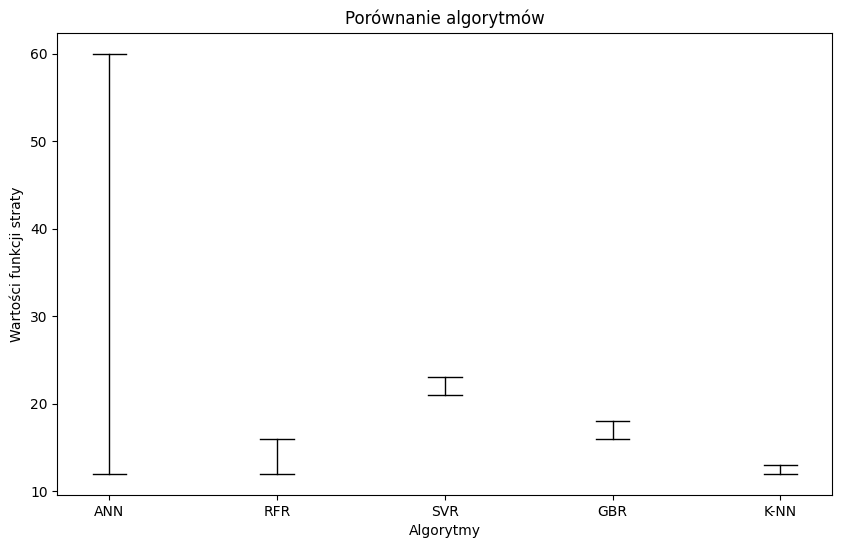

In [55]:
import matplotlib.pyplot as plt

algorithms = ['ANN', 'RFR', 'SVR', 'GBR', 'K-NN']
min_values = [12, 12, 21, 16, 12]
max_values = [60, 16, 23, 18, 13]

algorithm_numeric = list(range(len(algorithms)))

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(algorithms)):
    ax.plot([algorithm_numeric[i], algorithm_numeric[i]], [min_values[i], max_values[i]], color='black', linewidth=1)
    ax.plot([algorithm_numeric[i] - 0.1, algorithm_numeric[i] + 0.1], [min_values[i], min_values[i]], color='black', linewidth=1)
    ax.plot([algorithm_numeric[i] - 0.1, algorithm_numeric[i] + 0.1], [max_values[i], max_values[i]], color='black', linewidth=1)

ax.set_xticks(algorithm_numeric)
ax.set_xticklabels(algorithms)
ax.set_xlabel('Algorytmy')
ax.set_ylabel('Wartości funkcji straty')
ax.set_title('Porównanie algorytmów')

# Show the plot
plt.show()

## Wnioski

Wyniki uzyskane przy zastosowaniu ANN były bardzo zróżnicowane, w zależności od konfiguracji sieci. Choć najlepsze wyniki straty wynosiły nawet 12, to inne konfiguracje sieci zwracały wyniki sięgające aż do 60. Trenowanie trwało czasami wiele minut.

Wykorzystnie alternatywnych algorytmów pozwoliło na uzyskanie równie dobrych wyników w o wiele prostszy i szybszy sposób.

K-NN okazał się najszybszy, a zarazem zapewnił wyrównanie najlepszych uzyskanych wcześniej wyników. Podobne rezultaty uzyskano algorytmem RFR, lecz z nieco dluższym czasem trenowania.

Algorytmy SVR i GBR dały zadowalające wyniki przy niskim czasie trenowania, ale K-NN i RFR okazały się od nich jeszcze lepsze.
